# Decision Tree con GridSearchCV

Questo notebook ottimizza un modello Decision Tree sui dati `selfMade` usando GridSearchCV su diversi valori di `max_depth` e criteri di split (`gini`, `entropy`).

In [1]:
import pandas as pd
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model,plot_roc_curve

X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()

In questo caso a differenza di 4c_decision_tree_selfMade_gridSearch_acc.ipynb il parametro refit viene impostato su f1. Come possiamo notare dall'output infatti la profondità max_depth cambia ma il criterio rimane invariato

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(range(2, 20)),
    'criterion': ['gini', 'entropy']
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scoring, refit='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Migliori parametri trovati:", grid_search.best_params_)

Migliori parametri trovati: {'criterion': 'entropy', 'max_depth': 7}


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

evaluate_and_save_model(
    best_model,
    "decision tree selfmade gridsearch f1",
    y_train,
    y_pred_train,
    y_test,
    y_pred,
    "../results/classification_selfMade/decision_tree/gridsearch",
    "../models/decisiontree_selfmade_gridsearch_f1.joblib"
)

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, max_depth=3, feature_names=X_train.columns, class_names=["False", "True"])
plt.savefig("../results/classification_selfMade/decision_tree/gridsearch/decision_tree_grid_preview_f1.png")
plt.close()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
for criterion in results_df["param_criterion"].unique():
    subset = results_df[results_df["param_criterion"] == criterion]
    plt.plot(subset["param_max_depth"], subset["mean_test_f1"], marker='o', label=criterion.capitalize())

plt.title("Confronto F1-score medio: Gini vs Entropy")
plt.xlabel("max_depth")
plt.ylabel("Mean F1-Score (cross-validation)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../results/classification_selfMade/decision_tree/gridsearch/f1_score_comparison.png")
plt.close()

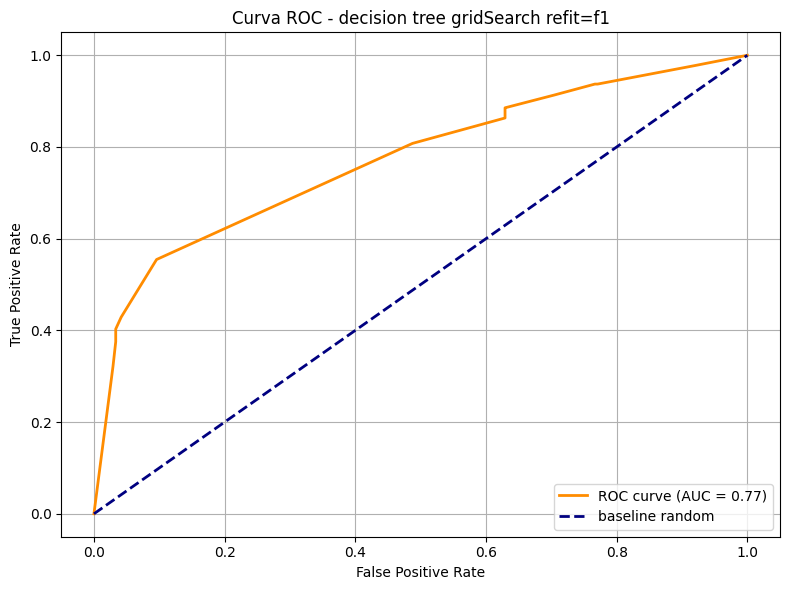

np.float64(0.7724661121380161)

In [6]:
plot_roc_curve(best_model, X_test, y_test, "decision tree gridSearch refit=f1",f"../results/classification_selfMade/roc")
